# Importing Essentials and Exploring the Data

**Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
plt.style.use("ggplot")
#pd.set_option('max_columns', 200)



**Importing CSV file**


In [2]:
df = pd.read_csv('../input/employee-dataset/Employee.csv')

**Data Preparation**

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**df.columns** Returns the columns' names

In [4]:
df.columns


Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

**df.dtypes** Returns the data types

In [5]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

**Making changes as needed** (optional)

In [6]:
#Change type:
df['Age'] = df['Age'].astype(float)

df.dtypes

Education                     object
JoiningYear                    int64
City                          object
PaymentTier                    int64
Age                          float64
Gender                        object
EverBenched                   object
ExperienceInCurrentDomain      int64
LeaveOrNot                     int64
dtype: object

In [7]:
#Rename Columns
df.columns
df.rename(columns={'PaymentTier':'PaymentLeague', 
                   'ExperienceInCurrentDomain': 'ExperienceInDomain' })

,Education,JoiningYear,City,PaymentLeague,Age,Gender,EverBenched,ExperienceInDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34.0,Male,No,0,0
1,Bachelors,2013,Pune,1,28.0,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38.0,Female,No,2,0
3,Masters,2016,Bangalore,3,27.0,Male,No,5,1
4,Masters,2017,Pune,3,24.0,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26.0,Female,No,4,0
4649,Masters,2013,Pune,2,37.0,Male,No,2,1
4650,Masters,2018,New Delhi,3,27.0,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30.0,Male,Yes,2,0


**Data Exploration**

**Data insights** | df.describe()

Using describe function we have a deeper understanding of data.

This approach helps us interpret the data more effectively and formulate meaningful insights.

For example, the mean value in the Age column is 31.56, which suggests the **average employee age** in this data set is around **29,3 years**.


In [8]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


**Checking for null values, duplicates etc**

In [9]:
df.isnull().sum()



Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**isna()** function is used to detect missing values

It returns a DataFrame with boolean values (True for missing values, False otherwise).

In [10]:
#Null or No Values
df.isna()

#Number of NoValues
df.isna().sum() 

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**df.info()** A helpful snapshot of the structure and data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4653 non-null   int64  
 2   City                       4653 non-null   object 
 3   PaymentTier                4653 non-null   int64  
 4   Age                        4653 non-null   float64
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 327.3+ KB


**Duplicates**

In [12]:
#Duplicates
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4648     True
4649    False
4650    False
4651    False
4652     True
Length: 4653, dtype: bool

In [13]:
#Subset Duplicates
df.duplicated(subset=['Age'])

#Locate the duplicates
df.loc[df.duplicated(subset=['JoiningYear'])].head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4,Masters,2017,Pune,3,24.0,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22.0,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34.0,Female,No,2,1
8,Bachelors,2016,Pune,3,23.0,Male,No,1,0
9,Masters,2017,New Delhi,2,37.0,Male,No,2,0


In [14]:
#Show duplicates
df.query('City == "Bangalore"') 

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34.0,Male,No,0,0
3,Masters,2016,Bangalore,3,27.0,Male,No,5,1
5,Bachelors,2016,Bangalore,3,22.0,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34.0,Female,No,2,1
10,Masters,2012,Bangalore,3,27.0,Male,No,5,1
...,...,...,...,...,...,...,...,...,...
4643,Bachelors,2013,Bangalore,3,31.0,Female,No,5,0
4646,Bachelors,2013,Bangalore,3,25.0,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26.0,Female,No,4,0
4651,Bachelors,2012,Bangalore,3,30.0,Male,Yes,2,0


In [15]:
#Remove Duplicates
# ~ Inverse: the "~" is used to filter out the duplicate rows and retain only the unique ones in the resulting DataFrame.
df = df.loc[~df.duplicated(subset=['JoiningYear', 'Age'])]\
      .reset_index(drop=True).copy()
        #removes (drops) error index. Μετρά από την αρχή με τη σειρά

df.shape

(139, 9)

# Feature Understanding
**Plotting Feature Distributions**
    
*      Histogram    
*      KDE
*      Boxplot

While **df.duplicated()** identifies rows with identical values across all columns, utilizing **df['JoiningYear'].value_counts()** provides valuable insight into the frequency of each unique value within the 'JoiningYear' column **specifically**. 

This approach allows for a comprehensive understanding of the distribution of joining years across the dataset.

For examples, the year 2017 seems to be the most common joining year, followed by 2015. 

It could be interesting to explore if there are any trends related to the year employees join the company (e.g., hiring trends, economic conditions).

In [16]:
df['JoiningYear'].value_counts()

JoiningYear
2017    20
2013    20
2014    20
2016    20
2015    20
2012    20
2018    19
Name: count, dtype: int64

**What are the top 3 cities with the most employees?**

Text(0, 0.5, 'Count')

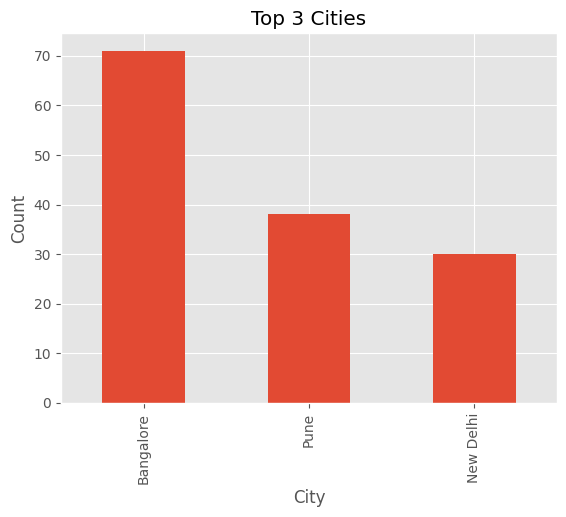

In [17]:
ax = df['City'].value_counts() \
    .head(5) \
    .plot(kind='bar', title = 'Top 3 Cities')
ax.set_ylabel('Count')


****How are the employee ages distributed?****

**Histogram to visualize the distribution of employee ages**

Text(0.5, 0, 'Age')

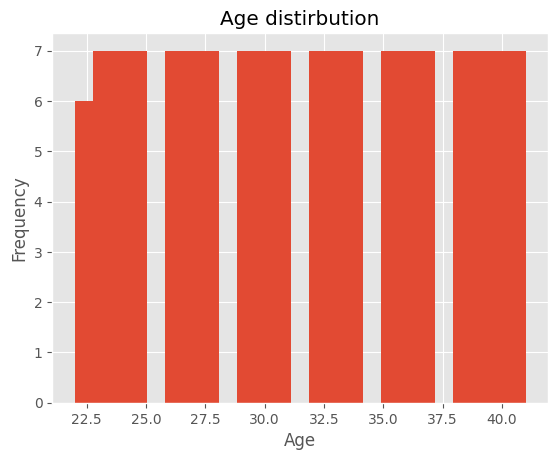

In [18]:

dist = df['Age'].plot(kind='hist', 
                      bins= 25, 
                      title = 'Age distirbution')
dist.set_xlabel('Age')

**Kernel density estimation (KDE) plot to visualize the distribution of employee ages**

Unlike histograms that use bars, KDE plots use a smooth curve to represent the probability density of the data

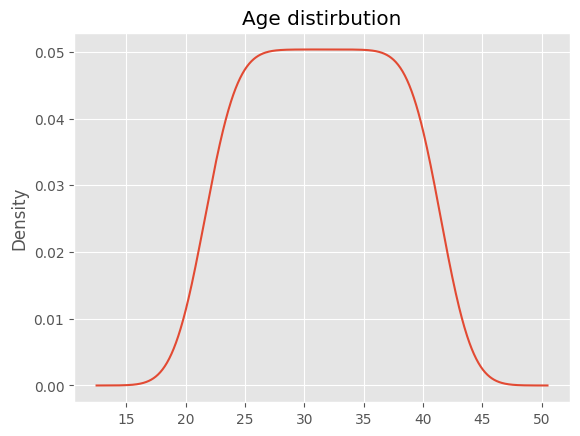

In [19]:
dist = df['Age'].plot(kind='kde', 
                        # no bins
                      title = 'Age distirbution')

# Feature Relationships

**Scatterplot:** 
 * Visualize relationship between two numerical features
 


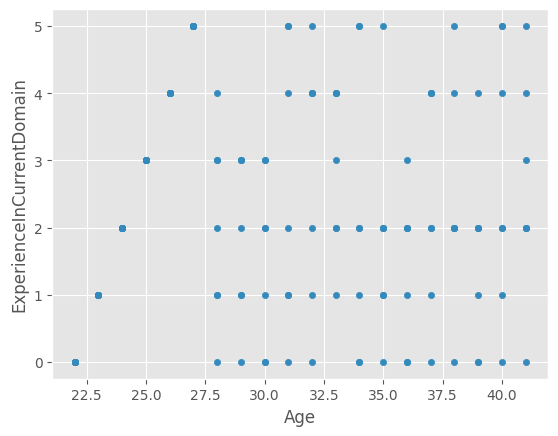

In [20]:
df.plot(kind='scatter', x='Age', y='ExperienceInCurrentDomain')

plt.show()

<Axes: xlabel='Age', ylabel='ExperienceInCurrentDomain'>

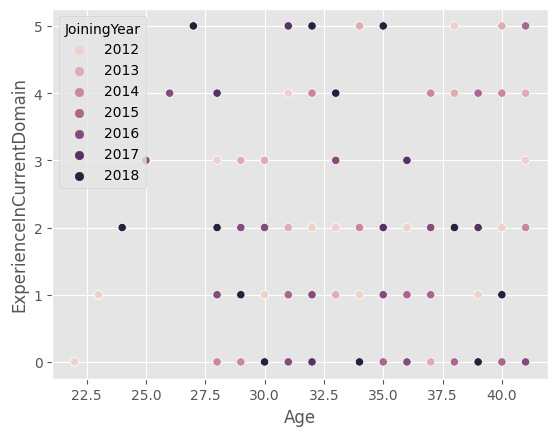

In [21]:
#Seaborn (for more complpex analysis)

sns.scatterplot(x='Age', 
                y='ExperienceInCurrentDomain',
                hue= 'JoiningYear',
               data=df)

 

**Pairplot:** 
 * Explore relationships between all pairs of features
 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


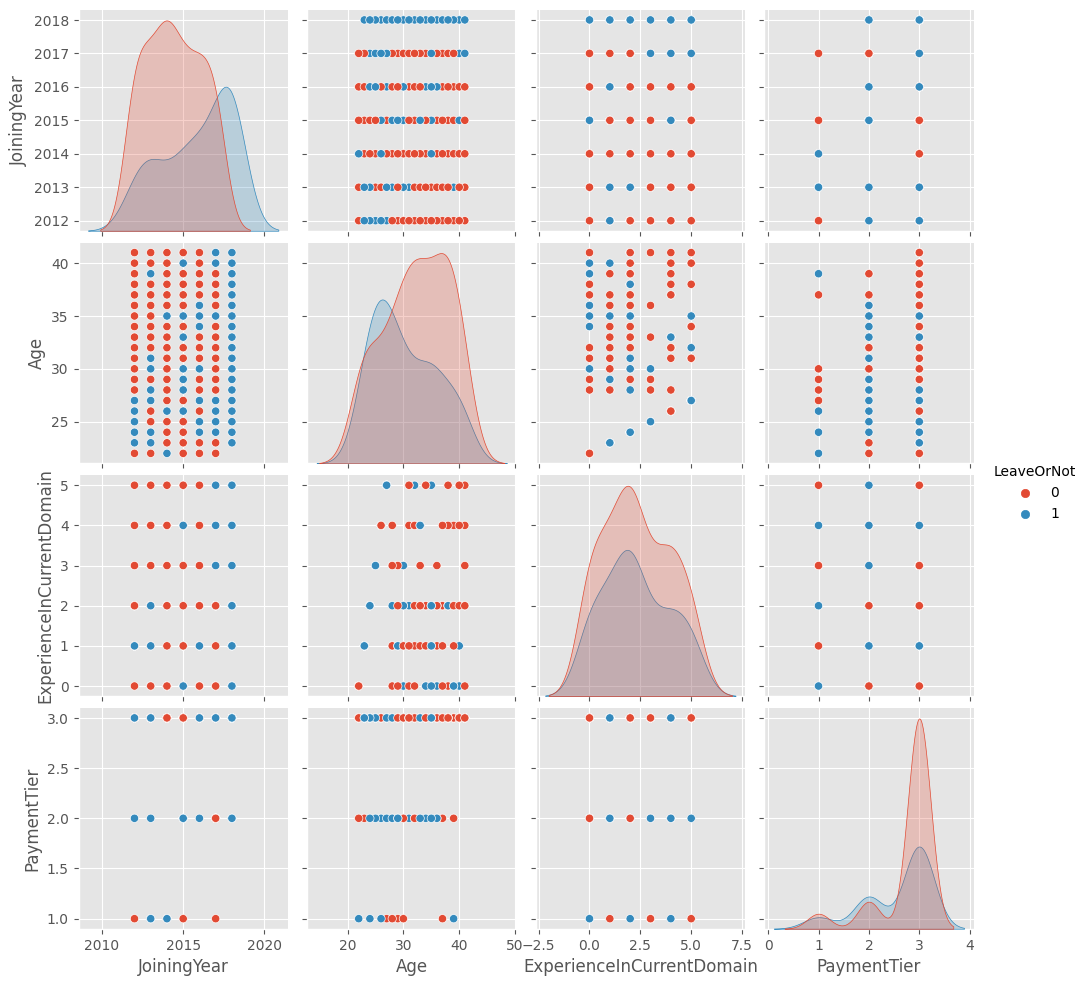

In [22]:
sns.pairplot(df, 
             vars=['JoiningYear','Age','ExperienceInCurrentDomain','PaymentTier'],
            hue='LeaveOrNot')

**Groupby Comparisons:**
 * Compare feature distribution across different groups defined by another categorical feature

In [23]:
# Group DataFrame by PaymentTier
grouped_by_payment_tier = df.groupby('PaymentTier')

# Analyze how 'Age' distribution varies by 'PaymentTier' 
print(grouped_by_payment_tier['Age'].describe())

             count       mean       std   min    25%   50%    75%   max
PaymentTier                                                            
1             10.0  29.000000  5.312459  22.0  26.25  28.0  29.75  39.0
2             23.0  30.652174  4.959918  22.0  27.50  30.0  34.50  39.0
3            106.0  32.009434  5.906405  22.0  27.00  32.5  37.00  41.0


* The **standard deviation (std)** for all three tiers is around 5, indicating a similar level of spread in employee ages within each payment tier.


There's no clear indication of a significant age gap between employees in different payment tiers based on this data.


In [24]:
#Correlation
    #drop null values
    #corr() => correlation between the values
df_corr = df[['JoiningYear','Age','ExperienceInCurrentDomain','PaymentTier']].dropna().corr()
df_corr

,JoiningYear,Age,ExperienceInCurrentDomain,PaymentTier
JoiningYear,1.000000,0.018102,-0.074292,-0.035826
Age,0.018102,1.000000,0.035559,0.152099
ExperienceInCurrentDomain,-0.074292,0.035559,1.000000,0.062095
PaymentTier,-0.035826,0.152099,0.062095,1.000000


**Heatmap Correlation:** 
 * Overview of correlation strength and direction between all numerical features

<Axes: >

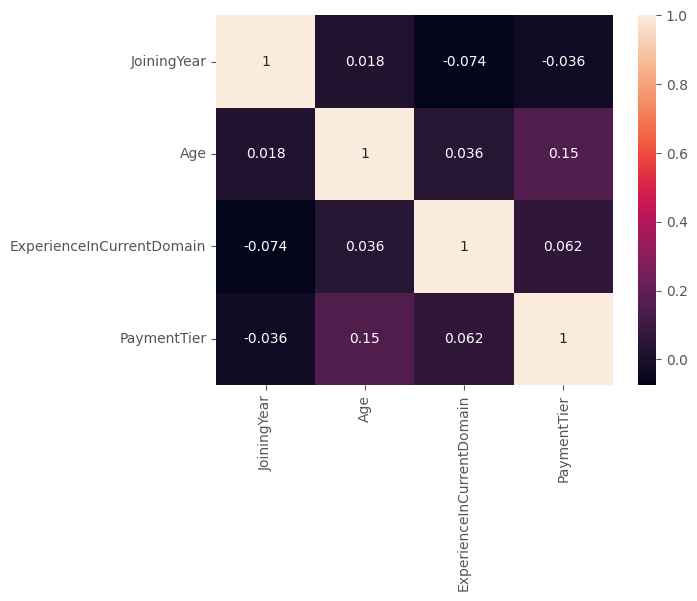

In [25]:
sns.heatmap(df_corr, annot=True)